In [ ]:
#to throw it back together
Clusterdf['cluster'] = results.labels_

In [52]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [53]:
crime = pd.read_csv('C:/Users/sabri/Documents/GitHub/NewYorkCityCrimes2015/Lab3_Individual_Files/Sabrina/FE1_NYPD_Complaint_Data_Historic.csv') # read in the csv %%file

C:\Users\sabri\Anaconda3\envs\ML7331\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [54]:
crime.describe()

,CMPLNT_NUM,KY_CD,PD_CD,ADDR_PCT_CD,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Duration,Duration_to_PD,Day,Year,GeoCell,GeoCell_X,GeoCell_Y
count,1.048575e+06,1.048575e+06,1.047842e+06,1.048574e+06,1.016158e+06,1.016158e+06,1.016158e+06,1.016158e+06,842416.000000,1.048510e+06,1.048510e+06,1.048510e+06,1.016123e+06,1.016157e+06,1.016124e+06
mean,5.497027e+08,2.953382e+02,4.099135e+02,6.380729e+01,1.004983e+06,2.067818e+05,4.073420e+01,-7.392516e+01,3.328113,1.359763e+01,1.552258e+01,2.014346e+03,5.844382e+01,6.444581e+00,6.199925e+00
std,2.598666e+08,1.505240e+02,2.192328e+02,3.434066e+01,2.146524e+04,3.043238e+04,8.353300e-02,7.741049e-02,5.232735,2.331575e+02,8.803343e+00,8.898275e-01,2.079365e+01,1.441555e+00,2.031922e+00
min,1.000007e+08,1.010000e+02,1.010000e+02,1.000000e+00,9.133190e+05,1.210800e+05,4.049877e+01,-7.425508e+01,0.000000,-2.410000e+02,1.000000e+00,1.910000e+03,1.000000e+00,1.000000e+00,1.000000e+00
25%,3.244583e+08,1.170000e+02,2.540000e+02,4.000000e+01,9.919982e+05,1.839220e+05,4.067144e+01,-7.397206e+01,1.000000,0.000000e+00,8.000000e+00,2.014000e+03,4.600000e+01,6.000000e+00,5.000000e+00
50%,5.494480e+08,3.410000e+02,3.570000e+02,6.600000e+01,1.004598e+06,2.053300e+05,4.073021e+01,-7.392661e+01,1.000000,0.000000e+00,1.500000e+01,2.014000e+03,5.600000e+01,6.000000e+00,6.000000e+00
75%,7.746526e+08,3.510000e+02,6.370000e+02,9.400000e+01,1.016552e+06,2.348090e+05,4.081116e+01,-7.388336e+01,2.000000,1.000000e+00,2.300000e+01,2.015000e+03,7.600000e+01,7.000000e+00,8.000000e+00
max,9.999996e+08,8.810000e+02,9.750000e+02,1.230000e+02,1.067226e+06,2.718200e+05,4.091272e+01,-7.370058e+01,24.000000,3.822300e+04,3.100000e+01,2.015000e+03,9.900000e+01,1.000000e+01,1.000000e+01


In [55]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 38 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   CMPLNT_NUM         1048575 non-null  int64  
 1   CMPLNT_FR_DT       1048510 non-null  object 
 2   CMPLNT_FR_TM       1048575 non-null  object 
 3   CMPLNT_TO_DT       842616 non-null   object 
 4   CMPLNT_TO_TM       843002 non-null   object 
 5   RPT_DT             1048575 non-null  object 
 6   KY_CD              1048575 non-null  int64  
 7   OFNS_DESC          1045695 non-null  object 
 8   PD_CD              1047842 non-null  float64
 9   PD_DESC            1047842 non-null  object 
 10  CRM_ATPT_CPTD_CD   1048574 non-null  object 
 11  LAW_CAT_CD         1048575 non-null  object 
 12  JURIS_DESC         1048575 non-null  object 
 13  BORO_NM            1048575 non-null  object 
 14  ADDR_PCT_CD        1048574 non-null  float64
 15  LOC_OF_OCCUR_DESC  830823 non-nu

In [56]:
#drop Geocell and coordinate data
if 'Latitude' in crime:    
    del crime['Latitude'] 
if 'Longitude' in crime:    
    del crime['Longitude'] 
if 'Geocell' in crime:    
    del crime['Geocell'] 
if 'Geocell_X' in crime:    
    del crime['Geocell_X'] 
if 'Geocell_Y' in crime:    
    del crime['Geocell_Y'] 
if 'X_COORD_CD' in crime:
    del crime['X_COORD_CD']
if 'Y_COORD_CD' in crime:
    del crime['Y_COORD_CD']
if 'BORO_NM' in crime:
    del crime['BORO_NM']

In [57]:
#grabbing a copy of the original dataset, post variable drop.  I need this to append the final labels back to
crime_df = crime

In [58]:
# perform one-hot encoding of the categorical data on 'JURIS_DESC','BORO_NM','LOC_OF_OCCUR_DESC',
#'ADDR_PCT_CD','PREM_TYP_DESC','Day_Name','Month','Duration_lbl','Season','Daytime'
tmp_df = pd.get_dummies(crime.JURIS_DESC,prefix='JURIS_DESC')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.LOC_OF_OCCUR_DESC,prefix='LOC_OF_OCCUR_DESC')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.ADDR_PCT_CD,prefix='ADDR_PCT_CD')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.PREM_TYP_DESC,prefix='PREM_TYP_DESC')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.Day_Name,prefix='Day_Name')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.Month,prefix='Month')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.Duration_lbl,prefix='Duration_lbl')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.Season,prefix='Season')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.Daytime,prefix='Daytime')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.Daytime,prefix='OFNS_DESC')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.Daytime,prefix='CRM_ATPT_CPTD_CD')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.Daytime,prefix='LAW_CAT_CD')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

In [59]:
#Now we drop the original variables
if 'JURIS_DESC' in crime:    
    del crime['JURIS_DESC'] # get rid of the original category as it is now one-hot encoded
if 'LOC_OF_OCCUR_DESC' in crime:    
    del crime['LOC_OF_OCCUR_DESC'] # get rid of the original category as it is now one-hot encoded
if 'ADDR_PCT_CD' in crime:    
    del crime['ADDR_PCT_CD'] # get rid of the original category as it is now one-hot encoded
if 'PREM_TYP_DESC' in crime:    
    del crime['PREM_TYP_DESC'] # get rid of the original category as it is now one-hot encoded
if 'Day_Name' in crime:    
    del crime['Day_Name'] # get rid of the original category as it is now one-hot encoded
if 'Month' in crime:    
    del crime['Month'] # get rid of the original category as it is now one-hot encoded
if 'Duration_lbl' in crime:    
    del crime['Duration_lbl'] # get rid of the original category as it is now one-hot encoded
if 'Season' in crime:    
    del crime['Season'] # get rid of the original category as it is now one-hot encoded
if 'Daytime' in crime:    
    del crime['Daytime'] # get rid of the original category as it is now one-hot encoded
if 'OFNS_DESC' in crime:    
    del crime['OFNS_DESC'] # get rid of the original category as it is now one-hot encoded
if 'CRM_ATPT_CPTD_CD' in crime:    
    del crime['CRM_ATPT_CPTD_CD'] # get rid of the original category as it is now one-hot encoded
if 'LAW_CAT_CD' in crime:    
    del crime['LAW_CAT_CD'] # get rid of the original category as it is now one-hot encoded


In [60]:
pd.set_option('display.max_rows', 300)
crime.dtypes

CMPLNT_NUM                                      int64
CMPLNT_FR_DT                                   object
CMPLNT_FR_TM                                   object
CMPLNT_TO_DT                                   object
CMPLNT_TO_TM                                   object
RPT_DT                                         object
KY_CD                                           int64
PD_CD                                         float64
PD_DESC                                        object
PARKS_NM                                       object
HADEVELOPT                                     object
Lat_Lon                                        object
Start_Dt_Tm                                    object
End_Dt_Tm                                      object
Duration                                      float64
Duration_to_PD                                float64
Day                                           float64
Year                                          float64
GeoCell                     

In [61]:
#dropping variables that don't add value or have sizeable missing values
if 'CMPLNT_NUM' in crime: #randomly assigned case id
    del crime['CMPLNT_NUM']
if 'CMPLNT_FR_DT' in crime:  #Date and time references have been binned
    del crime['CMPLNT_FR_DT']
if 'CMPLNT_FR_TM' in crime:
    del crime['CMPLNT_FR_TM']
if 'CMPLNT_TO_DT' in crime:
    del crime['CMPLNT_TO_DT']
if 'CMPLNT_TO_TM' in crime:
    del crime['CMPLNT_TO_TM']
if 'Start_Dt_Tm' in crime:
    del crime['Start_Dt_Tm']
if 'End_Dt_Tm' in crime:
    del crime['End_Dt_Tm']
if 'RPT_DT' in crime:   #this is an unknown at the time of the crime in many cases
    del crime['RPT_DT']
if 'PD_DESC' in crime:  #duplicate information from PD_CD
    del crime['PD_DESC']
if 'Lat_Lon' in crime:
    del crime['Lat_Lon']
if 'PARKS_NM' in crime:    
    del crime['PARKS_NM']
if 'HADEVELOPT' in crime:    
    del crime['HADEVELOPT']
if 'LOC_OF_OCCUR_DESC' in crime:    
    del crime['LOC_OF_OCCUR_DESC']

In [62]:
#dropping any remaining NANs
crime = crime.dropna() 

In [63]:
crime.isnull().values.any()
crime.isnull().sum().sum()

0

In [64]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)

principal_components = pca.fit_transform(crime)

df_PCA = pd.DataFrame(data=principal_components,columns=['PC1','PC2','PC3', 'PC4', 'PC5'])

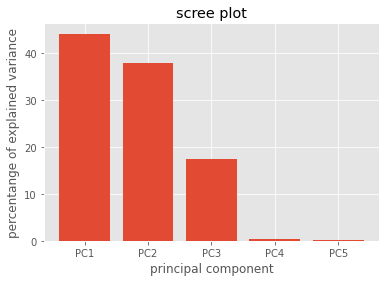

In [65]:
from matplotlib import pyplot as plt
plt.style.use("ggplot")

per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('percentange of explained variance')
plt.xlabel('principal component')
plt.title('scree plot')
plt.show()

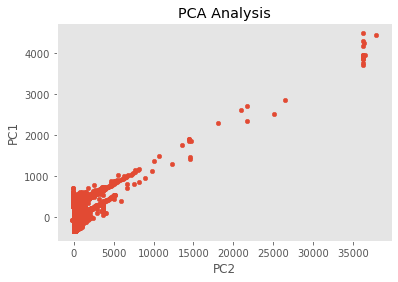

In [66]:
from matplotlib import pyplot as plt
plt.style.use("ggplot")

%matplotlib inline
X = df_PCA[['PC1','PC2']].values
plt.scatter(X[:,1], X[:,0]+np.random.random(X[:,1].shape)/2,
            s=20)

plt.xlabel('PC2'), plt.ylabel('PC1')
plt.grid()
plt.title('PCA Analysis')
plt.show()

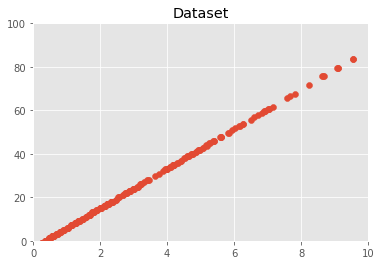

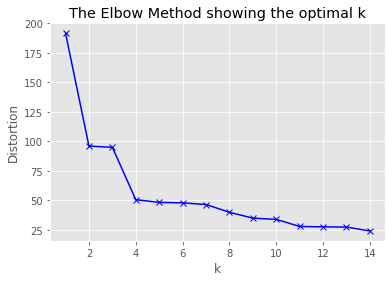

In [67]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

x1 = df_PCA[['PC1']].to_numpy()
x2 = df_PCA[['PC2']].to_numpy()

plt.plot()
plt.xlim([0, 10])
plt.ylim([0, 100])
plt.title('Dataset')
plt.scatter(x1, x2)
plt.show()
# create new plot and data
plt.plot()
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)
colors = ['b', 'g', 'r']
markers = ['o','v','s']

# k means determine k
distortions = []
K = range(1,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [68]:
X1=crime

https://stackoverflow.com/questions/55291667/getting-typeerror-slicenone-none-none-0-is-an-invalid-key
https://stackoverflow.com/questions/13187778/convert-pandas-dataframe-to-numpy-array

In [69]:
import numpy as np
import pandas as pd

X1.to_numpy()

array([[344., 101.,   1., ...,   1.,   0.,   0.],
       [106., 109.,   1., ...,   1.,   0.,   0.],
       [118., 792.,   0., ...,   1.,   0.,   0.],
       ...,
       [344., 113.,   1., ...,   0.,   0.,   1.],
       [235., 511.,   1., ...,   0.,   0.,   1.],
       [236., 782.,   1., ...,   0.,   0.,   1.]])

In [70]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import normalize 
from sklearn.decomposition import PCA 


In [71]:
# Scaling the data to bring all the attributes to a comparable level 
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X1) 
  
# Normalizing the data so that  
# the data approximately follows a Gaussian distribution 
X_normalized = normalize(X_scaled) 
  
# Converting the numpy array into a pandas DataFrame - code below fails as a dataframe - needs to be array
#X_normalized = pd.DataFrame(X_normalized) 

https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

In [82]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_normalized)
y_kmeans = kmeans.predict(X_normalized)

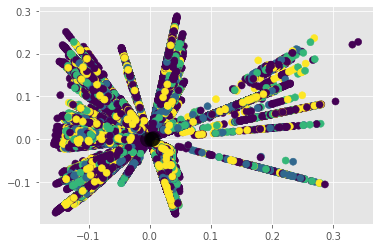

In [83]:
plt.scatter(X_normalized[:, 0], X_normalized[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

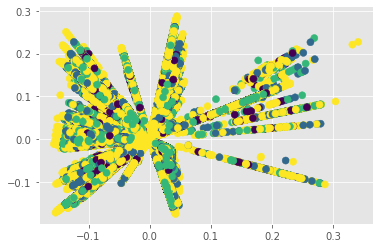

In [84]:
from sklearn.metrics import pairwise_distances_argmin
def find_clusters(X_normalized, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X_normalized.shape[0])[:n_clusters]
    centers = X_normalized[i]
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X_normalized, centers)
        # 2b. Find new centers from means of points
        new_centers = np.array([X_normalized[labels == i].mean(0)
                                for i in range(n_clusters)])
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    return centers, labels
centers, labels = find_clusters(X_normalized, 4)
plt.scatter(X_normalized[:, 0], X_normalized[:, 1], c=labels,
            s=50, cmap='viridis');

#this code will not complete on the full dataset.  Try again later if there is time

from sklearn.cluster import SpectralClustering  
model = SpectralClustering(n_clusters=4, affinity='nearest_neighbors',  
                           assign_labels='kmeans')  
labels = model.fit_predict(X_normalized)  
plt.scatter(X_normalized[:, 0], X_normalized[:, 1], c=labels,  
            s=50, cmap='viridis');  

**NOTES**  Once code above completes, run new cells at beginning to make df copy then come run labels

In [85]:
labels

array([3, 3, 3, ..., 2, 2, 2], dtype=int64)

In [96]:
df = pd.DataFrame(labels, columns = ["Cluster"])
print(df)

        Cluster
0             3
1             3
2             3
3             3
4             3
...         ...
817911        2
817912        2
817913        2
817914        2
817915        2

[817916 rows x 1 columns]


In [97]:
crime_df

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,Duration_to_PD,Month,Day,Year,Duration_lbl,Season,Daytime,GeoCell,GeoCell_X,GeoCell_Y
0,101109527,12/31/2015,23:45:00,NaN,NaN,12/31/2015,113,FORGERY,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",...,0.0,December,31.0,2015.0,NaN,Winter,Late Night,77.0,7.0,8.0
1,153401121,12/31/2015,23:36:00,NaN,NaN,12/31/2015,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,NaN,...,0.0,December,31.0,2015.0,NaN,Winter,Late Night,49.0,9.0,5.0
2,569369778,12/31/2015,23:30:00,NaN,NaN,12/31/2015,117,DANGEROUS DRUGS,503.0,"CONTROLLED SUBSTANCE,INTENT TO",...,0.0,December,31.0,2015.0,NaN,Winter,Late Night,76.0,6.0,8.0
3,968417082,12/31/2015,23:30:00,NaN,NaN,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,0.0,December,31.0,2015.0,NaN,Winter,Late Night,40.0,10.0,4.0
4,641637920,12/31/2015,23:25:00,12/31/2015,23:30:00,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,0.0,December,31.0,2015.0,Short,Winter,Late Night,55.0,5.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,317154175,11/1/2013,20:30:00,11/1/2013,21:00:00,11/1/2013,341,PETIT LARCENY,338.0,"LARCENY,PETIT FROM BUILDING,UN",...,0.0,November,1.0,2013.0,Short,Fall,Night,77.0,7.0,8.0
1048571,833410354,11/1/2013,20:28:00,11/1/2013,20:31:00,11/1/2013,344,ASSAULT 3 & RELATED OFFENSES,113.0,"MENACING,UNCLASSIFIED",...,0.0,November,1.0,2013.0,Short,Fall,Night,37.0,7.0,4.0
1048572,961949188,11/1/2013,20:25:00,NaN,NaN,11/1/2013,121,CRIMINAL MISCHIEF & RELATED OF,269.0,"MISCHIEF,CRIMINAL, UNCL 2ND",...,0.0,November,1.0,2013.0,NaN,Fall,Night,55.0,5.0,6.0
1048573,157608118,11/1/2013,20:25:00,11/1/2013,20:45:00,11/1/2013,235,DANGEROUS DRUGS,511.0,"CONTROLLED SUBSTANCE, POSSESSI",...,0.0,November,1.0,2013.0,Short,Fall,Night,97.0,7.0,10.0


In [98]:
df.head()


,Cluster
0,3
1,3
2,3
3,3
4,3


In [99]:
crime_labeled = df.join(crime_df)

crime_labeled.head()

,Cluster,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,Duration_to_PD,Month,Day,Year,Duration_lbl,Season,Daytime,GeoCell,GeoCell_X,GeoCell_Y
0,3,101109527,12/31/2015,23:45:00,NaN,NaN,12/31/2015,113,FORGERY,729.0,...,0.0,December,31.0,2015.0,NaN,Winter,Late Night,77.0,7.0,8.0
1,3,153401121,12/31/2015,23:36:00,NaN,NaN,12/31/2015,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,...,0.0,December,31.0,2015.0,NaN,Winter,Late Night,49.0,9.0,5.0
2,3,569369778,12/31/2015,23:30:00,NaN,NaN,12/31/2015,117,DANGEROUS DRUGS,503.0,...,0.0,December,31.0,2015.0,NaN,Winter,Late Night,76.0,6.0,8.0
3,3,968417082,12/31/2015,23:30:00,NaN,NaN,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,...,0.0,December,31.0,2015.0,NaN,Winter,Late Night,40.0,10.0,4.0
4,3,641637920,12/31/2015,23:25:00,12/31/2015,23:30:00,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,...,0.0,December,31.0,2015.0,Short,Winter,Late Night,55.0,5.0,6.0


In [102]:
#drop Geocell and coordinate data
if 'Latitude' in crime_labeled:    
    del crime_labeled['Latitude'] 
if 'Longitude' in crime_labeled:    
    del crime_labeled['Longitude'] 
if 'Geocell' in crime_labeled:    
    del crime_labeled['Geocell'] 
if 'Geocell_X' in crime_labeled:    
    del crime_labeled['Geocell_X'] 
if 'Geocell_Y' in crime_labeled:    
    del crime_labeled['Geocell_Y'] 
if 'X_COORD_CD' in crime_labeled:
    del crime_labeled['X_COORD_CD']
if 'Y_COORD_CD' in crime_labeled:
    del crime_labeled['Y_COORD_CD']
if 'BORO_NM' in crime_labeled:
    del crime_labeled['BORO_NM']

In [105]:
crime_labeled

,Cluster,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,Duration_to_PD,Month,Day,Year,Duration_lbl,Season,Daytime,GeoCell,GeoCell_X,GeoCell_Y
0,3,101109527,12/31/2015,23:45:00,NaN,NaN,12/31/2015,113,FORGERY,729.0,...,0.0,December,31.0,2015.0,NaN,Winter,Late Night,77.0,7.0,8.0
1,3,153401121,12/31/2015,23:36:00,NaN,NaN,12/31/2015,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,...,0.0,December,31.0,2015.0,NaN,Winter,Late Night,49.0,9.0,5.0
2,3,569369778,12/31/2015,23:30:00,NaN,NaN,12/31/2015,117,DANGEROUS DRUGS,503.0,...,0.0,December,31.0,2015.0,NaN,Winter,Late Night,76.0,6.0,8.0
3,3,968417082,12/31/2015,23:30:00,NaN,NaN,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,...,0.0,December,31.0,2015.0,NaN,Winter,Late Night,40.0,10.0,4.0
4,3,641637920,12/31/2015,23:25:00,12/31/2015,23:30:00,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,...,0.0,December,31.0,2015.0,Short,Winter,Late Night,55.0,5.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817911,2,517200908,4/26/2014,17:00:00,NaN,NaN,4/29/2014,105,ROBBERY,397.0,...,3.0,April,26.0,2014.0,NaN,Spring,Evening,78.0,8.0,8.0
817912,2,774189623,4/26/2014,16:30:00,4/26/2014,18:30:00,4/29/2014,121,CRIMINAL MISCHIEF & RELATED OF,269.0,...,3.0,April,26.0,2014.0,Short,Spring,Evening,35.0,5.0,4.0
817913,2,976601504,4/26/2014,16:00:00,4/26/2014,16:10:00,4/29/2014,578,HARRASSMENT 2,637.0,...,3.0,April,26.0,2014.0,Short,Spring,Evening,68.0,8.0,7.0
817914,2,223260676,4/26/2014,15:30:00,4/29/2014,8:10:00,4/29/2014,107,BURGLARY,213.0,...,3.0,April,26.0,2014.0,Long,Spring,Evening,65.0,5.0,7.0


In [106]:
crime_labeled.to_csv('crime_labeled.csv')

In [103]:
#try pairplots next
import seaborn 
import matplotlib.pyplot as plt 

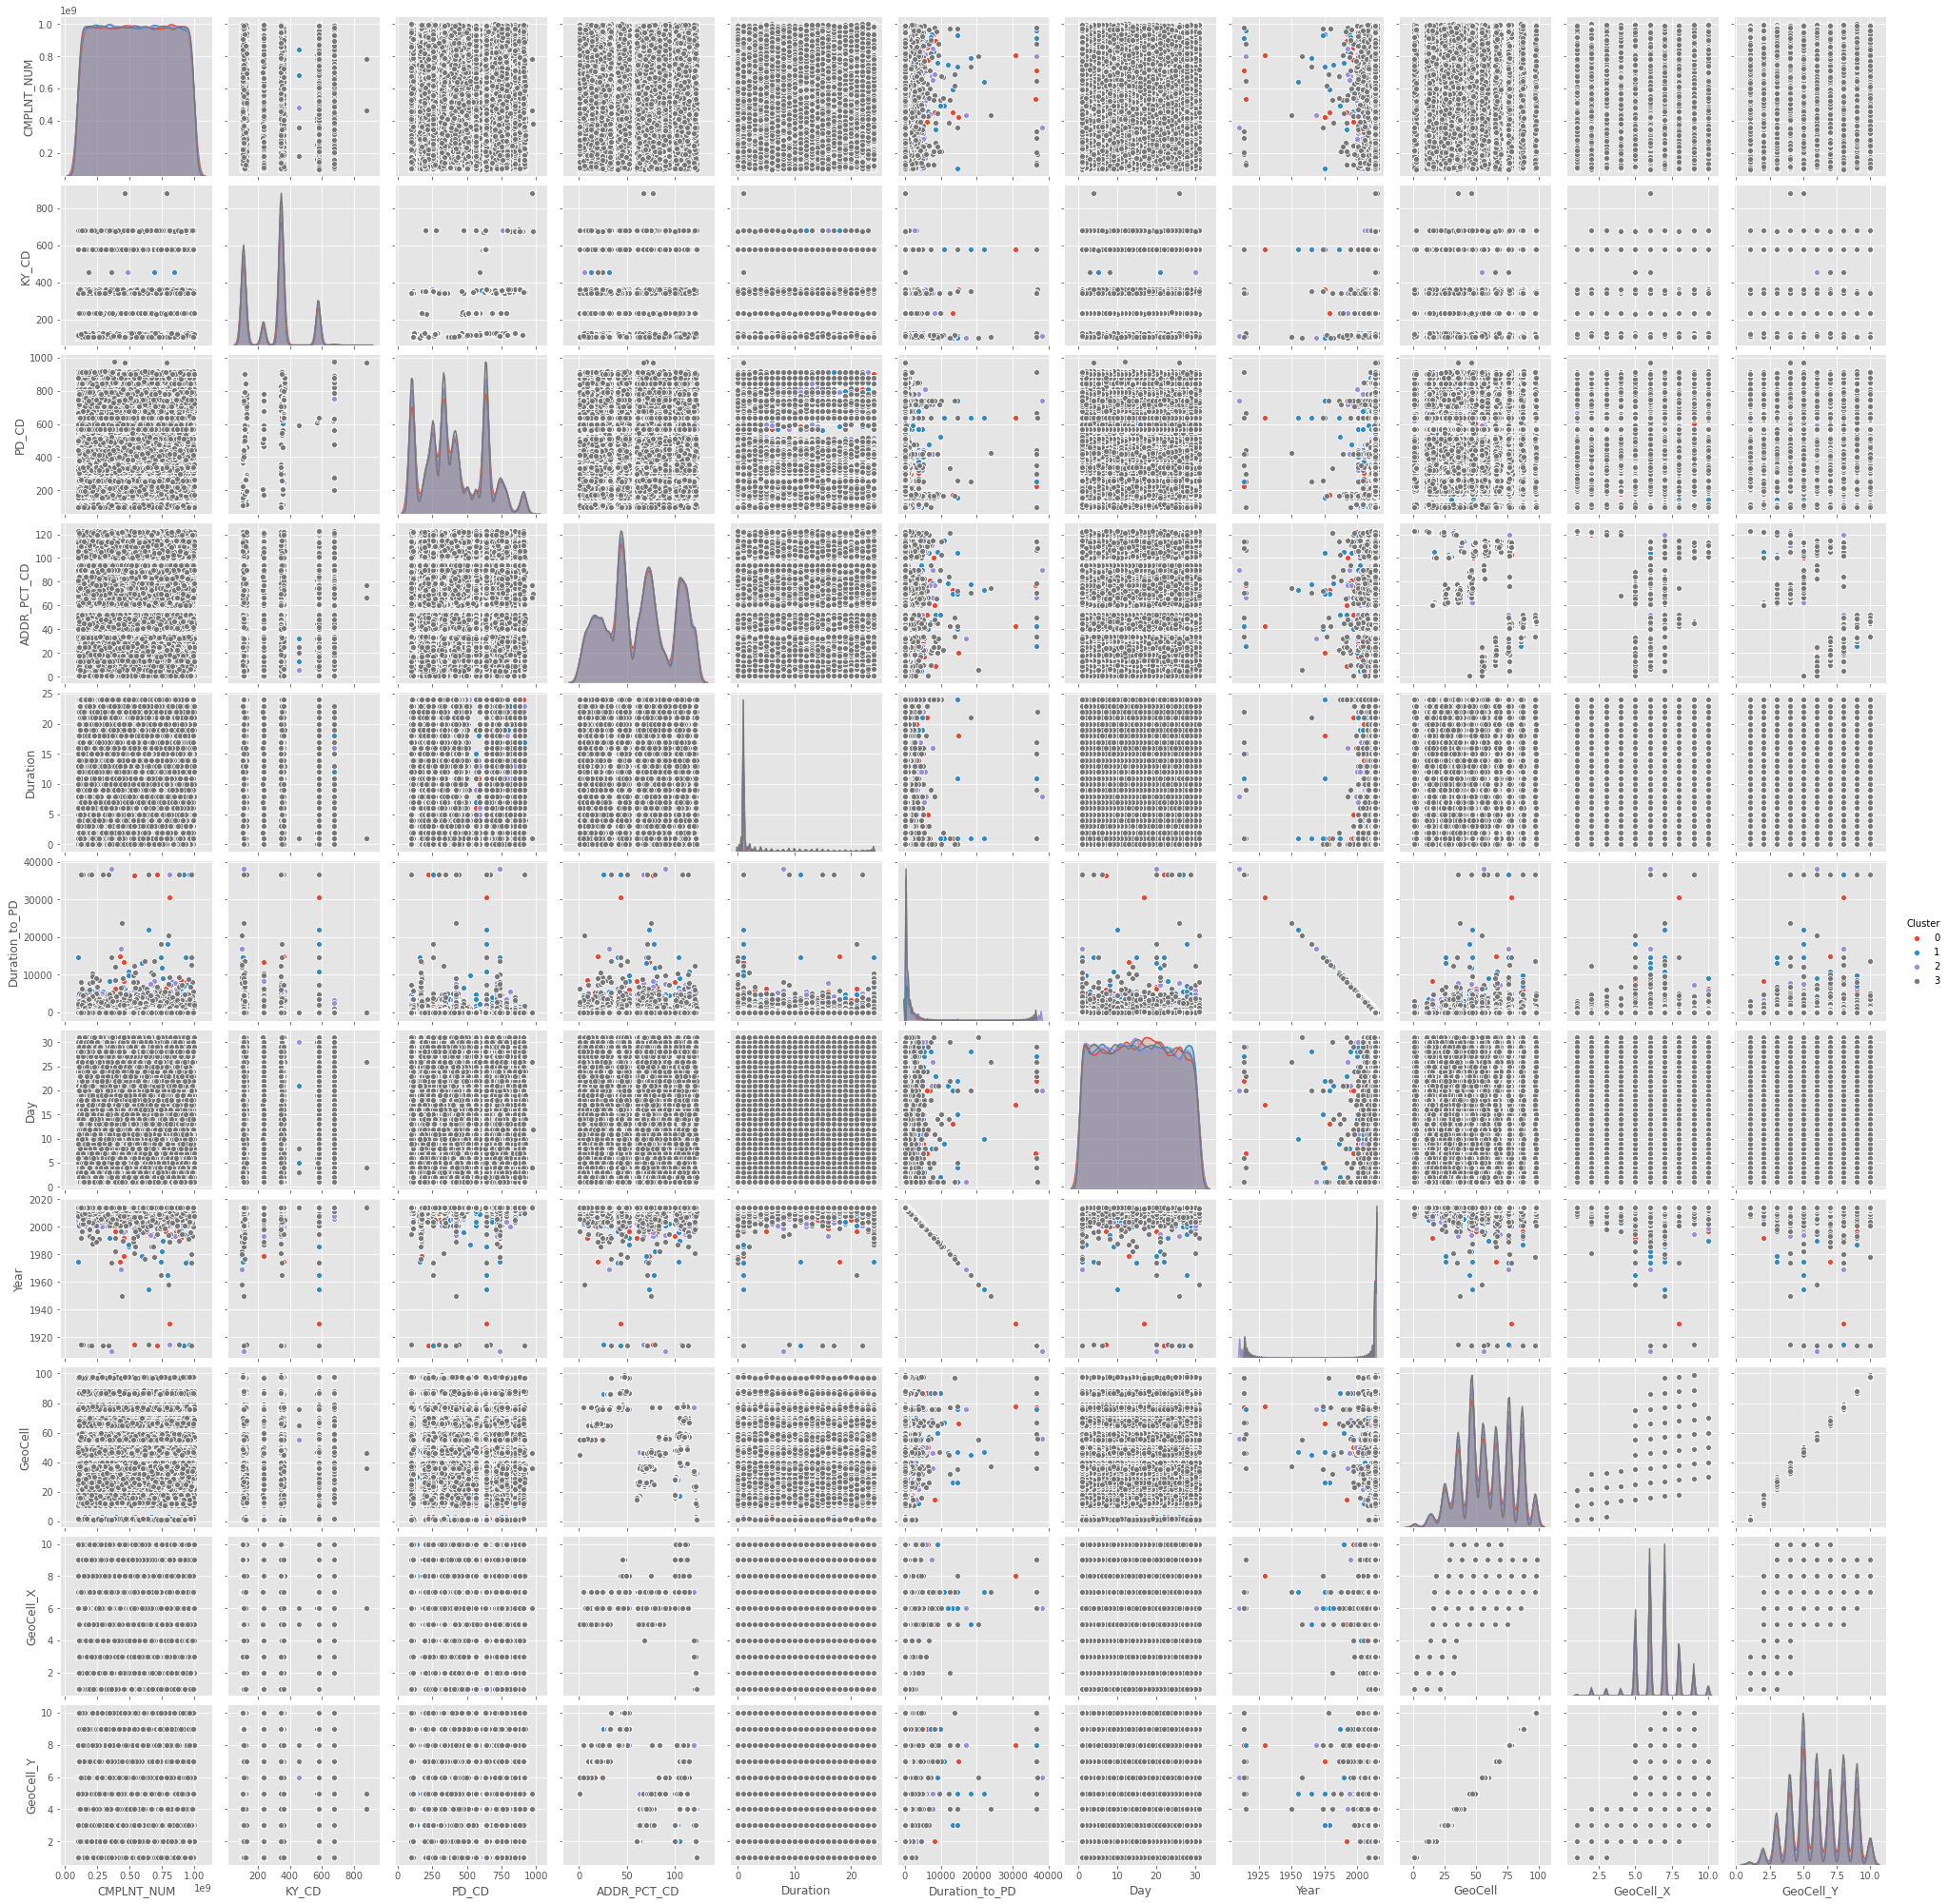

In [112]:
seaborn.pairplot(crime_labeled, hue ='Cluster') 
# to show 
plt.show()